<a href="https://colab.research.google.com/github/stevengregori92/ClusteringIntro/blob/main/McdonaldsCLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.6 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=7af61130167092b8243c8053294329b53d853a6768d26f167f27cc6c9f521b40
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=aad8e7c71dddc9f725aeadbe30f42207402f1164c141ee0012bfc4bae17861b3
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [3]:
import numpy as np
import pandas as pd
from jcopml.plot import plot_missing_value

#Import Dataset

In [4]:
!gdown https://drive.google.com/uc?id=188F0qUOg56DRYWIoyTbaBBrqREhcJGAP

Downloading...
From: https://drive.google.com/uc?id=188F0qUOg56DRYWIoyTbaBBrqREhcJGAP
To: /content/mcd.zip
100% 5.51k/5.51k [00:00<00:00, 11.7MB/s]


In [5]:
!unzip /content/mcd.zip

Archive:  /content/mcd.zip
  inflating: mcdonaldata.csv         


In [6]:
df = pd.read_csv('mcdonaldata.csv', index_col='Unnamed: 0')
df

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


#Cleaning Data

,missing_value,%
item,0,0.0
servesize,0,0.0
calories,0,0.0
protien,0,0.0
totalfat,0,0.0
satfat,0,0.0
transfat,0,0.0
cholestrol,0,0.0
carbs,0,0.0
sugar,0,0.0


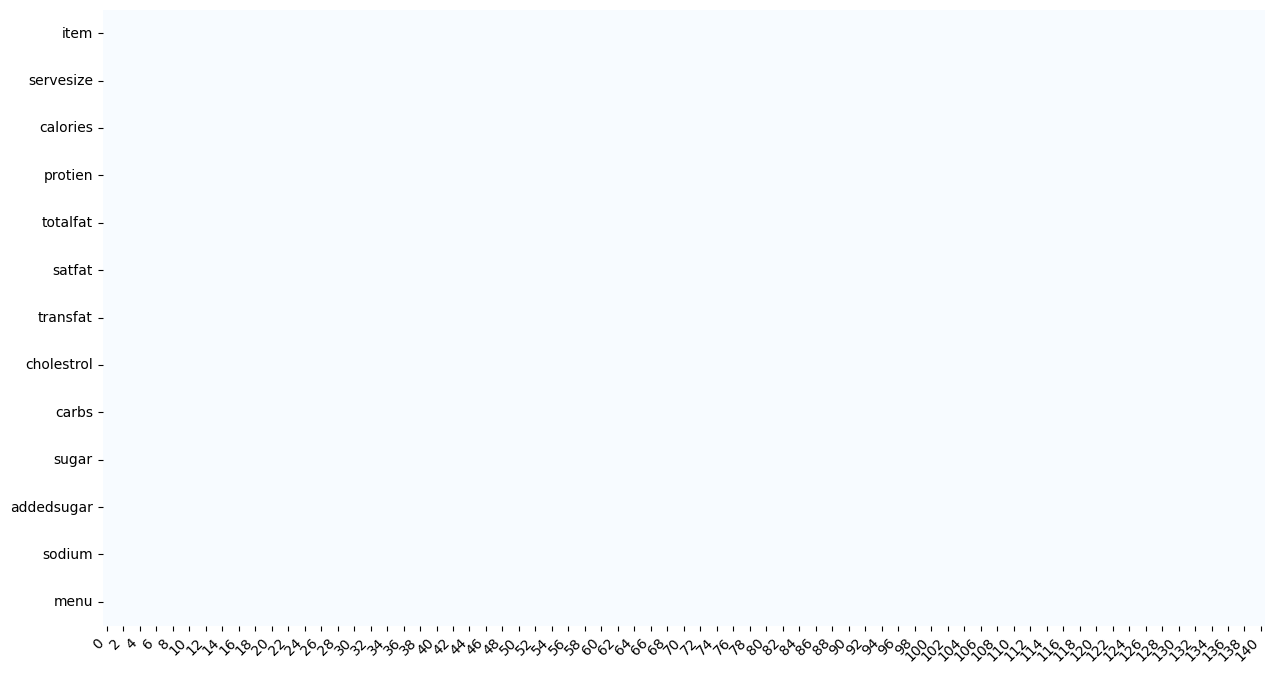

In [7]:
plot_missing_value(df, return_df=True)

In [8]:
df.drop(columns=['item'], inplace=True)

In [9]:
df.menu.value_counts()

mccafe        48
regular       36
beverage      17
dessert       12
gourmet       11
condiments     9
breakfast      8
Name: menu, dtype: int64

In [10]:
df.menu = df.menu.replace(['mccafe', 'regular', 'beverage', 'dessert', 'gourmet', 'condiments', 'breakfast'], [0,1,2,3,4,5,6])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   servesize   141 non-null    object 
 1   calories    141 non-null    object 
 2   protien     141 non-null    float64
 3   totalfat    141 non-null    float64
 4   satfat      141 non-null    float64
 5   transfat    141 non-null    float64
 6   cholestrol  141 non-null    float64
 7   carbs       141 non-null    float64
 8   sugar       141 non-null    float64
 9   addedsugar  141 non-null    float64
 10  sodium      141 non-null    float64
 11  menu        141 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 18.4+ KB


In [12]:
df[['servesize', 'calories']] = df[['servesize', 'calories']].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   servesize   141 non-null    float64
 1   calories    141 non-null    float64
 2   protien     141 non-null    float64
 3   totalfat    141 non-null    float64
 4   satfat      141 non-null    float64
 5   transfat    141 non-null    float64
 6   cholestrol  141 non-null    float64
 7   carbs       141 non-null    float64
 8   sugar       141 non-null    float64
 9   addedsugar  141 non-null    float64
 10  sodium      141 non-null    float64
 11  menu        141 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 18.4 KB


#Define Cluster

In [14]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

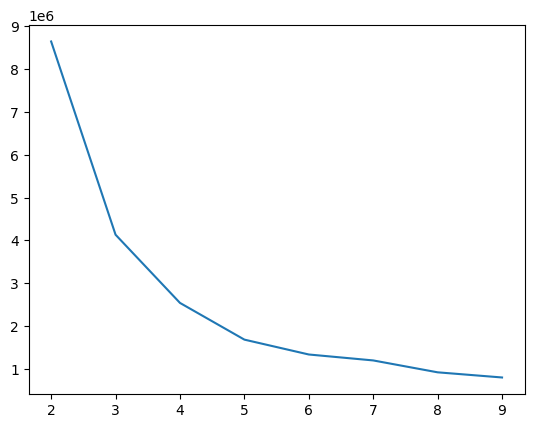

In [15]:
score=[]
for k in tqdm(range(2, 10)):
  model = KPrototypes(n_clusters=k)
  model.fit(df, categorical=[0,1])
  score.append(model.cost_)
plt.plot(range(2, 10), score)

#Training

In [16]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0,1])

In [17]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu,cluster
0,168.0,402.0,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1,1
1,146.0,339.0,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,1,1
2,199.0,652.0,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1,2
3,250.0,674.0,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1,2
4,177.0,512.0,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1,2


#Analyze Cluster

In [18]:
centroids = model.cluster_centroids_
centroids.shape

(3, 12)

In [19]:
df.columns

Index(['servesize', 'calories', 'protien', 'totalfat', 'satfat', 'transfat',
       'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium', 'menu'],
      dtype='object')

In [20]:
df_centroids = pd.DataFrame(centroids)
df_centroids

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.228021,5.037188,3.353750,0.762604,9.530927,26.296458,20.042396,13.747708,95.461562,1.343750,299.0,12.87
1,11.787037,14.039630,6.312963,2.936667,61.558889,31.135926,3.752593,2.016296,618.317407,2.555556,112.0,451.00
2,23.801111,30.881667,11.811333,0.213889,63.012222,54.086667,8.186111,4.627222,1406.259556,2.500000,145.0,411.00


In [21]:
df_centroids = pd.DataFrame(centroids, columns=['servesize', 'calories', 'protien', 'totalfat', 'satfat', 'transfat',
                                                'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium', 'menu'])
df_centroids

,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,3.228021,5.037188,3.353750,0.762604,9.530927,26.296458,20.042396,13.747708,95.461562,1.343750,299.0,12.87
1,11.787037,14.039630,6.312963,2.936667,61.558889,31.135926,3.752593,2.016296,618.317407,2.555556,112.0,451.00
2,23.801111,30.881667,11.811333,0.213889,63.012222,54.086667,8.186111,4.627222,1406.259556,2.500000,145.0,411.00


In [22]:
df.mean()

servesize     221.978723
calories      242.397447
protien         7.493333
totalfat       10.060355
satfat          5.000099
transfat        1.108865
cholestrol     26.321128
carbs          30.770851
sugar          15.409504
addedsugar     10.336950
sodium        362.918809
menu            1.723404
dtype: float64